**Dataset**

In [4]:
#importing libraries
import os

#function to count images
def count_images_in_folder(folder_path):
    count = 0
    for root, dirs, files in os.walk(folder_path):
        count += len([f for f in files if f.endswith(('.jpg', '.jpeg', '.png'))])
    return count

#train and test folder path
train_monkey_path = "train/monkey"
train_squirrel_path = "train/squirrel"
test_monkey_path = "test/monkey"
test_squirrel_path = "test/squirrel"

train_monkey_count = count_images_in_folder(train_monkey_path)
train_squirrel_count = count_images_in_folder(train_squirrel_path)
test_monkey_count = count_images_in_folder(test_monkey_path)
test_squirrel_count = count_images_in_folder(test_squirrel_path)

#checking
print(f"no. of images in train dataset : monkey = {train_monkey_count}")
print(f"no. of images in train dataset : squirrel = {train_squirrel_count}")
print(f"no. of images in test dataset : monkey = {test_monkey_count}")
print(f"no. of images in test dataset : squirrel = {test_squirrel_count}")


no. of images in train dataset : monkey = 80
no. of images in train dataset : squirrel = 80
no. of images in test dataset : monkey = 20
no. of images in test dataset : squirrel = 20


**Plotting the Images**

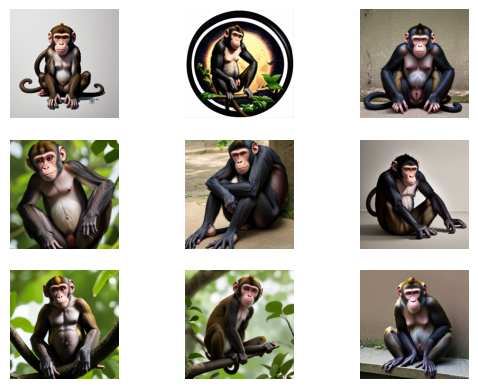

In [6]:
import os
from matplotlib import pyplot as plt
from matplotlib.image import imread

#defining the location of the dataset
folder = 'train/monkey'

#listing all files in the folder
file_names = os.listdir(folder)

#plotting the first 9 images
for i in range(9):
    plt.subplot(330 + 1 + i)
    filename = os.path.join(folder, file_names[i])
    image = imread(filename)
    plt.imshow(image)
    plt.axis('off')  # Hide axis for clarity
plt.show()


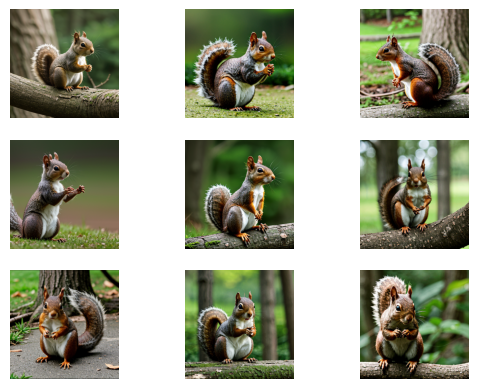

In [7]:
import os
from matplotlib import pyplot as plt
from matplotlib.image import imread

#defining the location of the dataset
folder = 'train/squirrel'

#listing all files in the folder
file_names = os.listdir(folder)

#plotting the first 9 images
for i in range(9):
    plt.subplot(330 + 1 + i)
    filename = os.path.join(folder, file_names[i])
    image = imread(filename)
    plt.imshow(image)
    plt.axis('off')  # Hide axis for clarity
plt.show()


In [10]:
import os
from numpy import asarray, save
from keras.preprocessing.image import load_img, img_to_array
from PIL import UnidentifiedImageError  # To handle specific image errors

# Define locations of the subdirectories for each class
monkey_folder = 'train/monkey/'
squirrel_folder = 'train/squirrel/'

# Initialize lists for storing images and labels
photos, labels = list(), list()

# Supported image file extensions
supported_formats = ('.jpg', '.jpeg', '.png')

# Process images in the "monkey" folder
for file in os.listdir(monkey_folder):
    # Create the full file path
    file_path = os.path.join(monkey_folder, file)
    
    # Check if it's a file and has a valid image extension
    if os.path.isfile(file_path) and file.lower().endswith(supported_formats):
        try:
            # Load and resize image to 200x200
            photo = load_img(file_path, target_size=(200, 200))
            
            # Convert to numpy array
            photo = img_to_array(photo)
            
            # Store image and label (0 for monkey)
            photos.append(photo)
            labels.append(0.0)
        
        except UnidentifiedImageError:
            print(f"Skipped corrupted or unrecognized file: {file_path}")

# Process images in the "squirrel" folder
for file in os.listdir(squirrel_folder):
    # Create the full file path
    file_path = os.path.join(squirrel_folder, file)
    
    # Check if it's a file and has a valid image extension
    if os.path.isfile(file_path) and file.lower().endswith(supported_formats):
        try:
            # Load and resize image to 200x200
            photo = load_img(file_path, target_size=(200, 200))
            
            # Convert to numpy array
            photo = img_to_array(photo)
            
            # Store image and label (1 for squirrel)
            photos.append(photo)
            labels.append(1.0)
        
        except UnidentifiedImageError:
            print(f"Skipped corrupted or unrecognized file: {file_path}")

# Convert lists to numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

# Save the reshaped photos and labels
save('monkey_vs_squirrel_photos.npy', photos)
save('monkey_vs_squirrel_labels.npy', labels)

(160, 200, 200, 3) (160,)


In [11]:
#loading and confirming the shape
from numpy import load
photos = load('monkey_vs_squirrel_photos.npy')
labels = load('monkey_vs_squirrel_labels.npy')
print(photos.shape, labels.shape)

(160, 200, 200, 3) (160,)


In [13]:
# reate directories
from os import makedirs
dataset_home = 'dataset_monkey_vs_squirrel/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['monkey/', 'squirrel/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)

In [19]:
import os
from random import random, seed
from shutil import copyfile

# Seed random number generator
seed(1)

# Define ratio of images to use for validation (e.g., 25% for validation)
val_ratio = 0.25

# Define source directory where the images are stored
src_directory = '/Users/shreya/Documents/a4/dataset_monkey_vs_squirrel/train'  # Your 'train/' directory path

# Define the home directory for where the new subdirectories will be created
dataset_home = '/Users/shreya/Documents/a4/dataset_monkey_vs_squirrel'  # Change this to your path

# Iterate through files in the source directory
for file in os.listdir(src_directory):
    # Define the full path for the source image
    src = os.path.join(src_directory, file)

    # Ensure the source is a file, not a directory
    if not os.path.isfile(src):
        continue  # Skip if it's a directory

    # Decide whether the file should go to the 'train' or 'test' directory
    dst_dir = 'train/'  # Default destination is 'train'
    if random() < val_ratio:  # 25% chance to go to 'test' directory
        dst_dir = 'test/'

    # Check for 'monkey' or 'squirrel' in the file name and create appropriate destination paths
    if 'monkey' in file:
        dst = os.path.join(dataset_home, dst_dir, 'monkey', file)
    elif 'squirrel' in file:
        dst = os.path.join(dataset_home, dst_dir, 'squirrel', file)
    else:
        continue  # Skip files that don't match either class

    # Copy the image from source to the new directory
    copyfile(src, dst)


In [22]:
import os
from shutil import copyfile
from random import random

# Define dataset home and source directory
dataset_home = '/Users/shreya/Documents/a4/dataset_monkey_vs_squirrel'  # Replace with your actual path
src_directory = '/Users/shreya/Documents/a4/dataset_monkey_vs_squirrel/train'  # Or the correct path where the images are stored

# Iterate through files in the source directory
for file in os.listdir(src_directory):
    src = os.path.join(src_directory, file)
    
    # Ensure the current file is not a directory
    if os.path.isfile(src):  
        dst_dir = '/Users/shreya/Documents/a4/dataset_monkey_vs_squirrel/train'
        if random() < 0.25:
            dst_dir = '/Users/shreya/Documents/a4/dataset_monkey_vs_squirrel/test'

        # Ensure destination directory exists
        if file.startswith('monkey'):
            dst = os.path.join(dataset_home, dst_dir, 'monkey', file)
        elif file.startswith('squirrel'):
            dst = os.path.join(dataset_home, dst_dir, 'squirrel', file)
        else:
            continue  # Skip files that don't match either class

        # Ensure destination directory exists
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        
        # Copy the file to the destination directory
        copyfile(src, dst)


In [4]:
training_time = []
training_loss = []
training_accuracy = []
testing_accuracy = []
number_of_model_parameters = []

**One Block VGG Model**

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Training Time > 80.64 seconds
Final Training Loss > 0.0236
Training Accuracy > 100.000
Testing Accuracy > 100.000


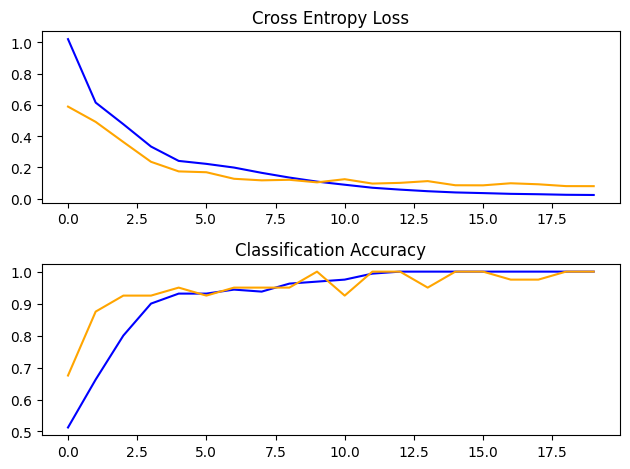

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 100, 100, 32)      0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 320000)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               40960128  
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 40961153 (156.25 MB)
Trainable params: 40961153 (156.25 MB)
Non-trainable params: 0 (0.00 Byte)
__________

In [5]:
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import time

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	#displaying the plots
	pyplot.tight_layout()
	pyplot.show()
    # # save plot to file
	# filename = sys.argv[0].split('/')[-1]
	# pyplot.savefig(filename + '_plot.png')
	# pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory('dataset_monkey_vs_squirrel/train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory('dataset_monkey_vs_squirrel/test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	start_time = time.time()
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
	end_time = time.time()
	train_time = end_time - start_time
	training_time.append(train_time)
	print(f"Training Time > {train_time:.2f} seconds")
	final_training_loss = history.history['loss'][-1]
	training_loss.append(final_training_loss)
	print(f"Final Training Loss > {final_training_loss:.4f}")
	# evaluate model
	_, acc_train = model.evaluate(train_it, steps=len(train_it), verbose=0)
	training_accuracy.append(acc_train)
	print('Training Accuracy > %.3f' % (acc_train * 100.0))
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	testing_accuracy.append(acc)
	print('Testing Accuracy > %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
	model.summary()

# entry point, run the test harness
run_test_harness()

In [6]:
number_of_model_parameters.append(40961153)

**Three Block VGG Model**

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Training Time > 61.71 seconds
Final Training Loss > 0.0899
Training Accuracy > 97.500
Testing Accuracy > 97.500


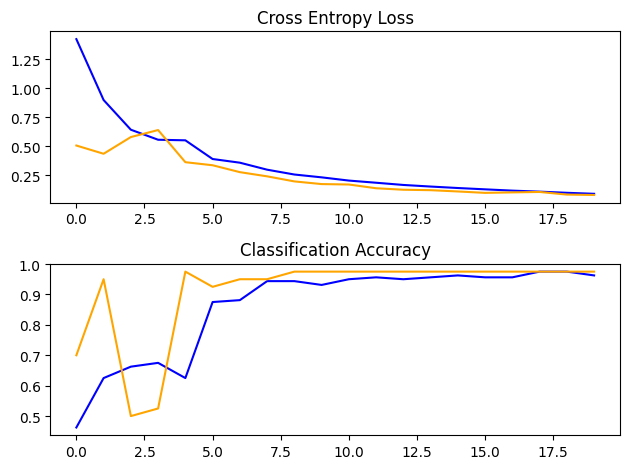

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 100, 100, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 50, 50, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 25, 25, 128)      

In [7]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	#displaying the plots
	pyplot.tight_layout()
	pyplot.show()
    # # save plot to file
	# filename = sys.argv[0].split('/')[-1]
	# pyplot.savefig(filename + '_plot.png')
	# pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory('dataset_monkey_vs_squirrel/train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory('dataset_monkey_vs_squirrel/test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	start_time = time.time()
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
	end_time = time.time()
	train_time = end_time - start_time
	training_time.append(train_time)
	print(f"Training Time > {train_time:.2f} seconds")
	final_training_loss = history.history['loss'][-1]
	training_loss.append(final_training_loss)
	print(f"Final Training Loss > {final_training_loss:.4f}")
	# evaluate model
	_, acc_train = model.evaluate(train_it, steps=len(train_it), verbose=0)
	training_accuracy.append(acc_train)
	print('Training Accuracy > %.3f' % (acc_train * 100.0))
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	testing_accuracy.append(acc)
	print('Testing Accuracy > %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
	model.summary()

# entry point, run the test harness
run_test_harness()

In [8]:
number_of_model_parameters.append(10333505)

**Three Block VGG Model with Data Augmentation**

In [9]:
# create data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
	width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
# prepare iterators
train_it = train_datagen.flow_from_directory('dataset_monkey_vs_squirrel/train/',
	class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = test_datagen.flow_from_directory('dataset_monkey_vs_squirrel/test/',
	class_mode='binary', batch_size=64, target_size=(200, 200))

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Training Time > 126.91 seconds
Final Training Loss > 0.1278
Training Accuracy > 95.625
Testing Accuracy > 100.000


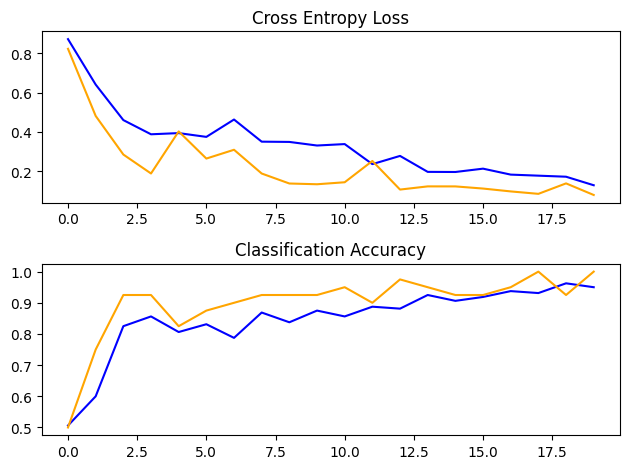

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 100, 100, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 50, 50, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 25, 25, 128)      

In [10]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	#displaying the plots
	pyplot.tight_layout()
	pyplot.show()
    # # save plot to file
	# filename = sys.argv[0].split('/')[-1]
	# pyplot.savefig(filename + '_plot.png')
	# pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	train_datagen = ImageDataGenerator(rescale=1.0/255.0,
		width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	test_datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = train_datagen.flow_from_directory('dataset_monkey_vs_squirrel/train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = test_datagen.flow_from_directory('dataset_monkey_vs_squirrel/test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	start_time = time.time()
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
	end_time = time.time()
	train_time = end_time - start_time
	training_time.append(train_time)
	print(f"Training Time > {train_time:.2f} seconds")
	final_training_loss = history.history['loss'][-1]
	training_loss.append(final_training_loss)
	print(f"Final Training Loss > {final_training_loss:.4f}")
	# evaluate model
	_, acc_train = model.evaluate(train_it, steps=len(train_it), verbose=0)
	training_accuracy.append(acc_train)
	print('Training Accuracy > %.3f' % (acc_train * 100.0))
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	testing_accuracy.append(acc)
	print('Testing Accuracy > %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
	model.summary()

# entry point, run the test harness
run_test_harness()

In [11]:
number_of_model_parameters.append(10333505)

**VGG16 Model (Fine-tuning all layers)**

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/10
3/3 [==============================] - 42s 13s/step - loss: 6.3270 - accuracy: 0.6938 - val_loss: 4.9691e-10 - val_accuracy: 1.0000
Epoch 2/10
3/3 [==============================] - 41s 13s/step - loss: 0.0109 - accuracy: 0.9875 - val_loss: 4.6878e-11 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 44s 18s/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 6.7768e-09 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 48s 19s/step - loss: 0.0083 - accuracy: 0.9937 - val_loss: 1.9327e-07 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 48s 15s/step - loss: 0.0057 - accuracy: 0.9937 - val_loss: 2.5187e-07 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 48s 19s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 4.8836e-07 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 48s 19s/ste

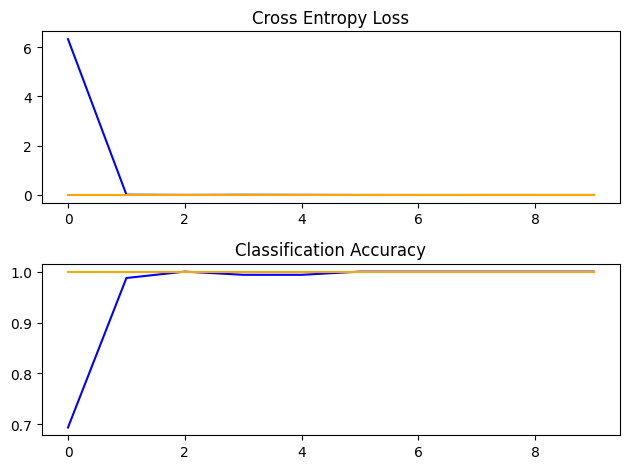

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [18]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark all layers as trainable
	for layer in model.layers:
		layer.trainable = True
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(learning_rate=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	#displaying the plots
	pyplot.tight_layout()
	pyplot.show()
    # # save plot to file
	# filename = sys.argv[0].split('/')[-1]
	# pyplot.savefig(filename + '_plot.png')
	# pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory('dataset_monkey_vs_squirrel/train/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	test_it = datagen.flow_from_directory('dataset_monkey_vs_squirrel/test/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# fit model
	start_time = time.time()
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
	end_time = time.time()
	train_time = end_time - start_time
	training_time.append(train_time)
	print(f"Training Time > {train_time:.2f} seconds")
	final_training_loss = history.history['loss'][-1]
	training_loss.append(final_training_loss)
	print(f"Final Training Loss > {final_training_loss:.4f}")
	# evaluate model
	_, acc_train = model.evaluate(train_it, steps=len(train_it), verbose=0)
	training_accuracy.append(acc_train)
	print('Training Accuracy > %.3f' % (acc_train * 100.0))
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	testing_accuracy.append(acc)
	print('Testing Accuracy > %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
	model.summary()

# entry point, run the test harness
run_test_harness()

In [19]:
number_of_model_parameters.append(17926209)

**VGG16 Model (Fine-tuning only MLP layers)**

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/10
3/3 [==============================] - 15s 5s/step - loss: 3.2216 - accuracy: 0.8125 - val_loss: 3.9503e-06 - val_accuracy: 1.0000
Epoch 2/10
3/3 [==============================] - 13s 5s/step - loss: 0.2396 - accuracy: 0.9937 - val_loss: 9.5304e-34 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 14s 4s/step - loss: 0.0252 - accuracy: 0.9937 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 14s 6s/step - loss: 2.0053e-22 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 14s 4s/step - loss: 2.2790e-25 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 15s 5s/step - loss: 9.0806e-29 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 14s 5

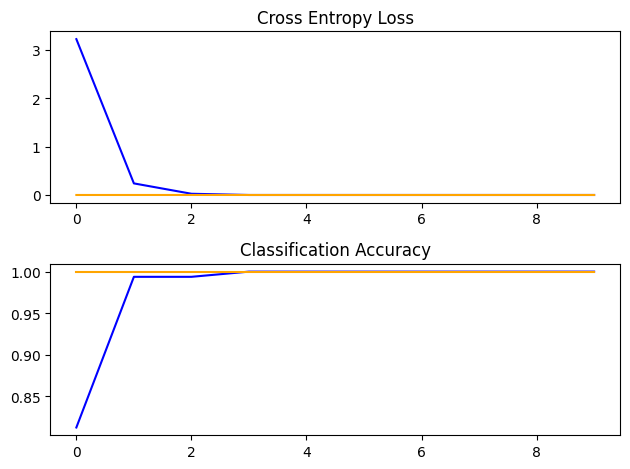

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [20]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark other layers as untrainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(learning_rate=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	#displaying the plots
	pyplot.tight_layout()
	pyplot.show()
    # # save plot to file
	# filename = sys.argv[0].split('/')[-1]
	# pyplot.savefig(filename + '_plot.png')
	# pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory('dataset_monkey_vs_squirrel/train/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	test_it = datagen.flow_from_directory('dataset_monkey_vs_squirrel/test/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# fit model
	start_time = time.time()
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
	end_time = time.time()
	train_time = end_time - start_time
	training_time.append(train_time)
	print(f"Training Time > {train_time:.2f} seconds")
	final_training_loss = history.history['loss'][-1]
	training_loss.append(final_training_loss)
	print(f"Final Training Loss > {final_training_loss:.4f}")
	# evaluate model
	_, acc_train = model.evaluate(train_it, steps=len(train_it), verbose=0)
	training_accuracy.append(acc_train)
	print('Training Accuracy > %.3f' % (acc_train * 100.0))
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	testing_accuracy.append(acc)
	print('Testing Accuracy > %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
	model.summary()

# entry point, run the test harness
run_test_harness()

In [21]:
number_of_model_parameters.append(17926209)

**Final Results**

In [23]:
import pandas as pd
models = ['One Block VGG', 'Three Block VGG', 'Three Block VGG with Data Augmentation', 'All layers trainable VGG16', 'Only MLP layers trainable VGG16']
df = pd.DataFrame({
    'Training Time': training_time,
    'Training Loss': training_loss,
    'Training Accuracy': training_accuracy,
    'Testing Accuracy': testing_accuracy,
    'Number of Model Parameters': number_of_model_parameters
}, index=models)

print(df)
print("(Number of parameters for VGG16 with only MLP trainable layers has 3211521 trainable parameters, and 14714688 untrainable parameters)")

                                        Training Time  Training Loss  \
One Block VGG                               80.635409   2.359653e-02   
Three Block VGG                             61.713192   8.989390e-02   
Three Block VGG with Data Augmentation     126.912653   1.278249e-01   
All layers trainable VGG16                 461.754966   2.353296e-04   
Only MLP layers trainable VGG16            143.885614   1.147433e-35   

                                        Training Accuracy  Testing Accuracy  \
One Block VGG                                     1.00000             1.000   
Three Block VGG                                   0.97500             0.975   
Three Block VGG with Data Augmentation            0.95625             1.000   
All layers trainable VGG16                        1.00000             1.000   
Only MLP layers trainable VGG16                   1.00000             1.000   

                                        Number of Model Parameters  
One Block VGG          